In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-default-dataset/Loan_Default.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import joblib


In [3]:
# Load the CSV
df = pd.read_csv("/kaggle/input/loan-default-dataset/Loan_Default.csv")

# Quick overview
print(df.shape)
df.head()


(148670, 34)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
# Count missing values
df.isnull().sum().sort_values(ascending=False)


Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
LTV                          15098
property_value               15098
income                        9150
loan_limit                    3344
approv_in_adv                  908
submission_of_application      200
age                            200
loan_purpose                   134
Neg_ammortization              121
term                            41
Region                           0
total_units                      0
Security_Type                    0
Status                           0
co-applicant_credit_type         0
Credit_Score                     0
credit_type                      0
ID                               0
Secured_by                       0
occupancy_type                   0
construction_type                0
year                             0
interest_only                    0
loan_amount                      0
business_or_commerci

In [5]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [6]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [7]:
df.isnull().sum().sum()  # Should be 0


0

In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.shape


(148670, 51)

In [9]:
X = df_encoded.drop('Status', axis=1)
y = df_encoded['Status']

# Check target distribution
print(y.value_counts())


Status
0    112031
1     36639
Name: count, dtype: int64


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (118936, 50)
Test shape: (29734, 50)


In [11]:
model = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


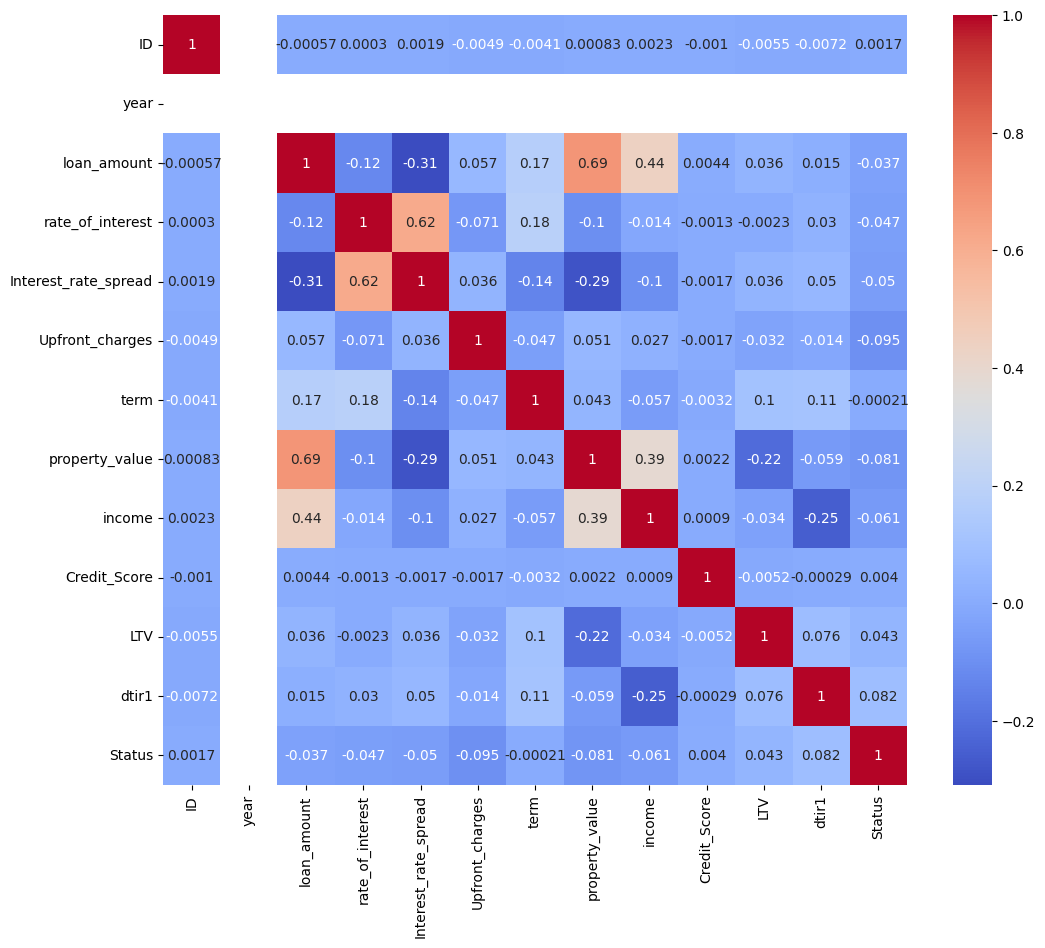

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only numeric columns
num_cols = X.select_dtypes(include=['float64','int64']).columns.tolist()

# Correlation
corr = df_encoded[num_cols + ['Status']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [13]:
X = df_encoded.drop(columns=['Status', 'Credit_Score', 'rate_of_interest', 'Interest_rate_spread'])  # example
y = df_encoded['Status']


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

model = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22406
           1       0.93      0.99      0.96      7328

    accuracy                           0.98     29734
   macro avg       0.97      0.98      0.97     29734
weighted avg       0.98      0.98      0.98     29734

[[21889   517]
 [   54  7274]]


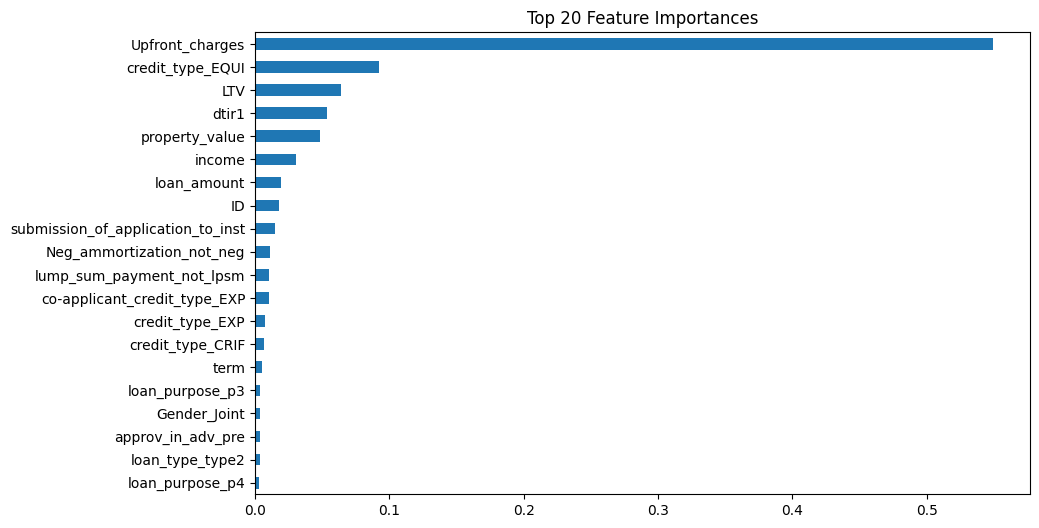

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Top 20 Feature Importances")
plt.show()


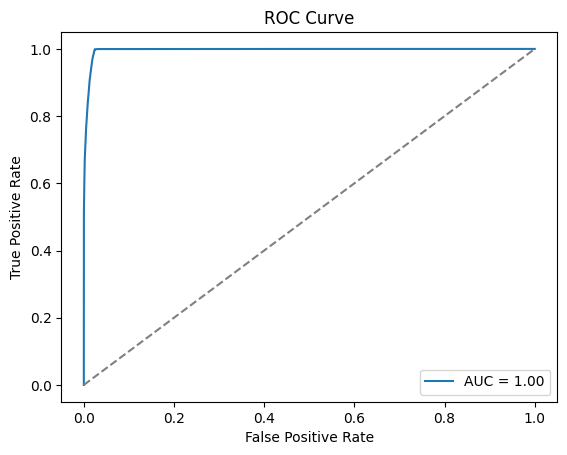

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


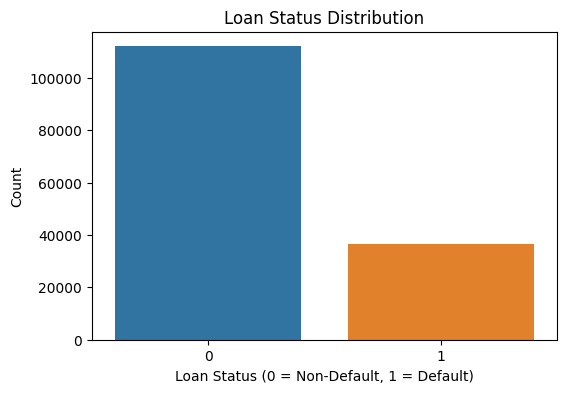

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Status')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (0 = Non-Default, 1 = Default)')
plt.ylabel('Count')
plt.show()


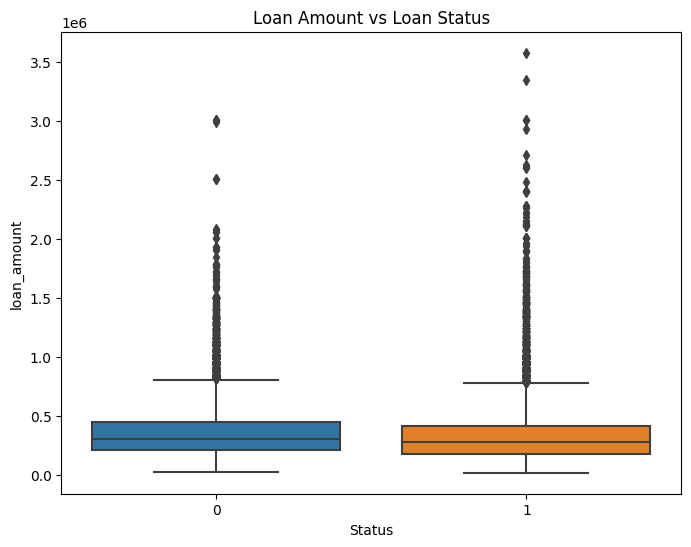

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Status', y='loan_amount')
plt.title('Loan Amount vs Loan Status')
plt.show()


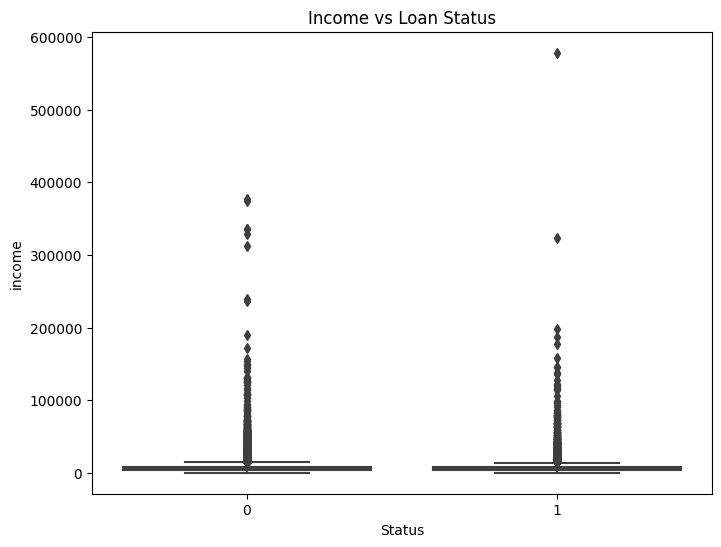

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Status', y='income')
plt.title('Income vs Loan Status')
plt.show()


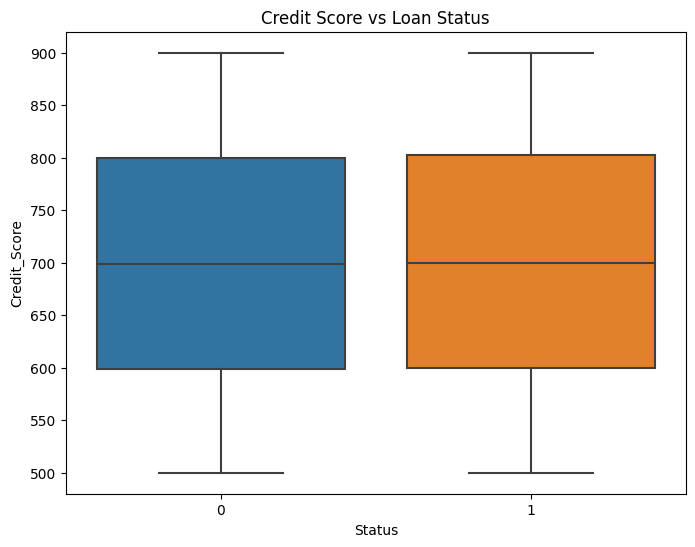

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Status', y='Credit_Score')
plt.title('Credit Score vs Loan Status')
plt.show()


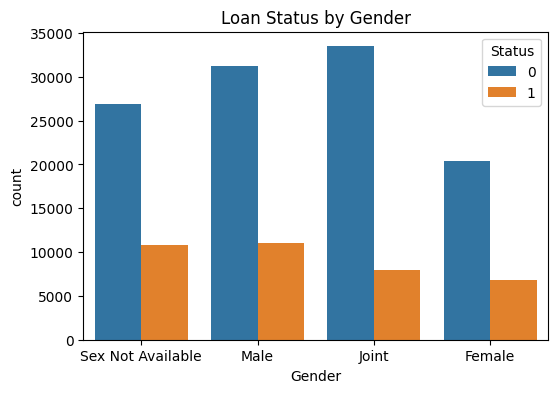

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Status')
plt.title('Loan Status by Gender')
plt.show()


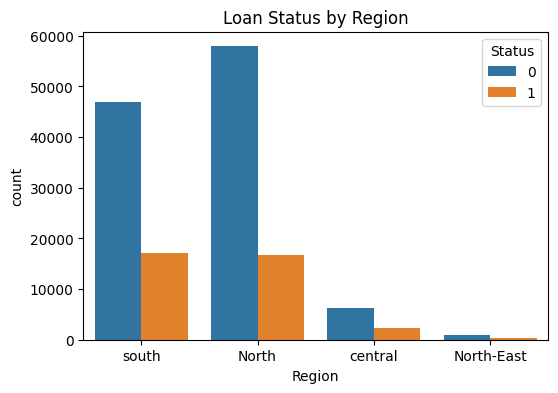

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Region', hue='Status')
plt.title('Loan Status by Region')
plt.show()


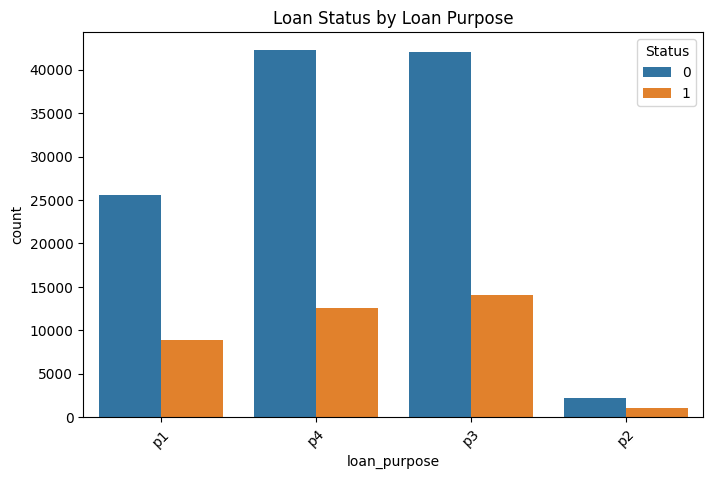

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='loan_purpose', hue='Status')
plt.title('Loan Status by Loan Purpose')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


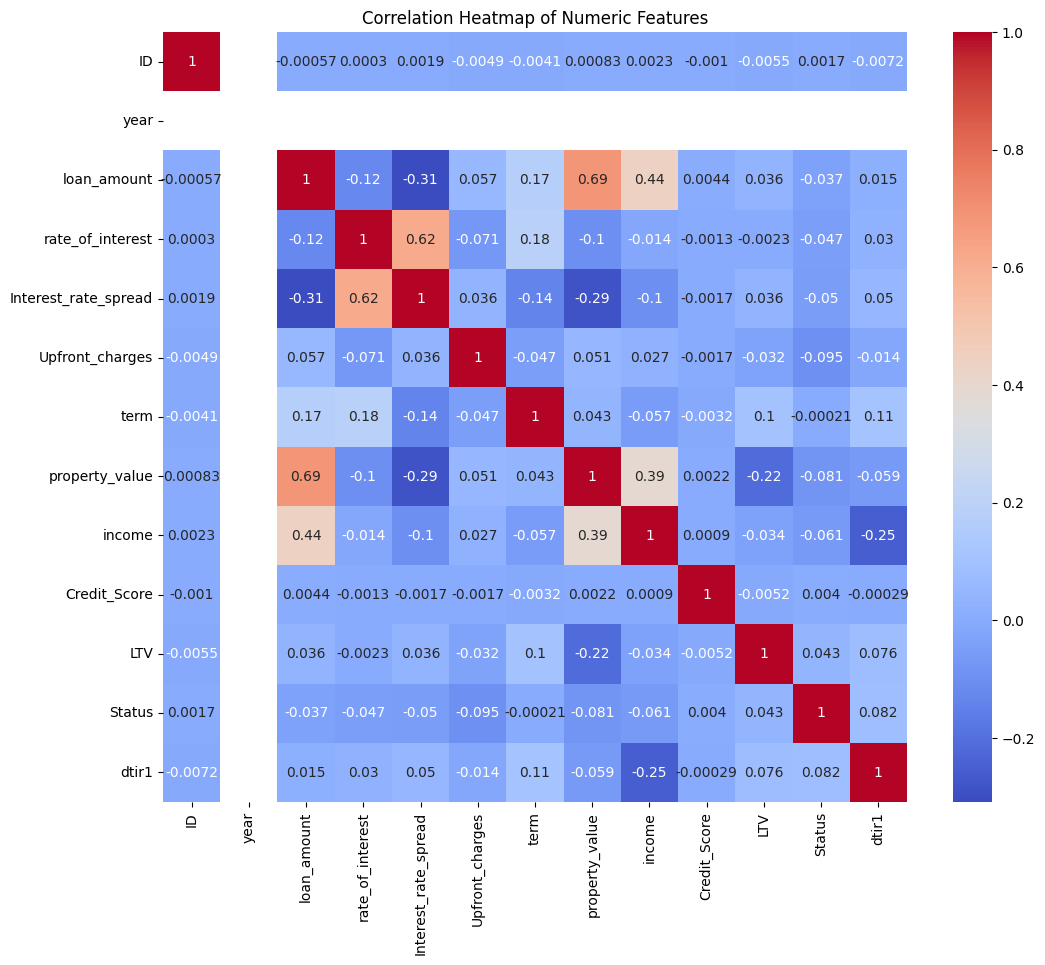

In [24]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [25]:
import joblib
joblib.dump(model, 'loan_default_model.pkl')


['loan_default_model.pkl']